In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
df.Class.unique()

array([0, 1])

In [6]:
print(df.Class.value_counts())
print(df.Class.value_counts(normalize = True))

0    283253
1       473
Name: Class, dtype: int64
0    0.998333
1    0.001667
Name: Class, dtype: float64


Acurácia :  0.920863309352518 

Matriz  



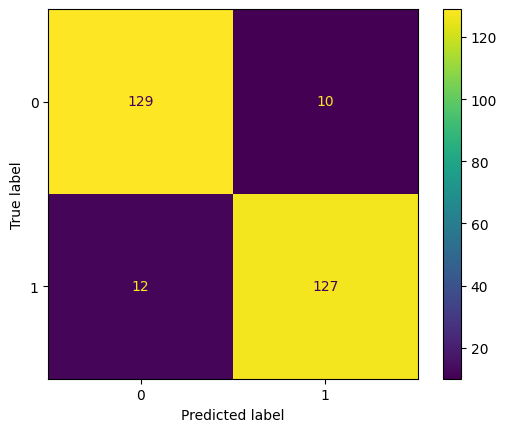

Matriz normalizada 



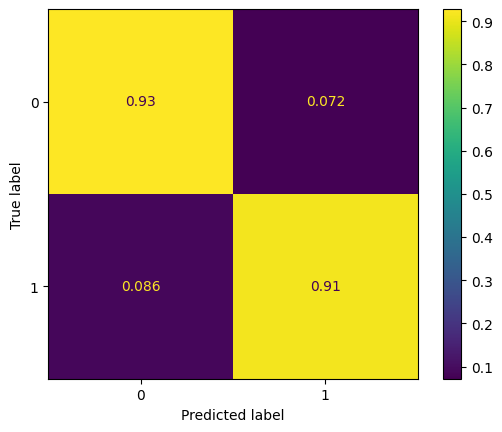

Reporte 

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       139
           1       0.93      0.91      0.92       139

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



In [7]:
X = (df.drop('Class', axis=1)).values
y = (df['Class']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7)

# Balanceando o dataset
rus = RandomUnderSampler()

X_train1, y_train1 = rus.fit_resample(X_train, y_train)
X_test1, y_test1 = rus.fit_resample(X_test, y_test)

#criando pipeline para utilizar o xgboost
scaler = StandardScaler()
xgb = XGBClassifier()

mod_pipe = make_pipeline(scaler, xgb)

mod_pipe.fit(X_train1, y_train1)
pred_mod = mod_pipe.predict(X_test1)

acc_score = mod_pipe.score(X_test1, y_test1)
print('Acurácia', ': ', acc_score,'\n')

mod_y_true = y_test1
mod_y_pred = list(mod_pipe.predict(X_test1))


ConfusionMatrixDisplay.from_predictions(mod_y_true, mod_y_pred)
print('Matriz ','\n')
plt.show()
ConfusionMatrixDisplay.from_predictions(mod_y_true, mod_y_pred, normalize = 'true')
print('Matriz normalizada','\n')
plt.show()
print('Reporte','\n')
print(classification_report(mod_y_true, mod_y_pred))

In [8]:
#O modelo proderia performar melhor se testarmos outros tipos de ajustes no dataset, como Smote ou Random Over Sampling. 
#Outra ótima maneira seria utilizar o método Pearson r para identificar as colunas com correlação baixa com nosso target e retirá-las do modelo.

In [9]:
import pickle

pickle.dump(xgb, open('model.pkl', 'wb'))